In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import confusion_matrix, recall_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.layers import Dropout


In [60]:
df = pd.read_csv('Loan_default.csv')
df = df.copy()
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [61]:
#Checking Missing values And Data Type
df.isna().sum()
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [62]:
#Summary Numerical data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [63]:
#Categorical Data
categorical = ['Education', 'EmploymentType','MaritalStatus', 'HasMortgage','HasDependents','LoanPurpose','HasCoSigner' ]
categorical

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [64]:
#Target variable
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [65]:
def categorical_data(feature):
    print(df[feature].value_counts())
    fig, ax = plt.subplots(figsize = (3,3))
    sns.countplot(x=feature, ax=ax, data=df)
    plt.show()

In [66]:
def pair_analysis(df, feature_x, feature_y):
    fig, ax = plt.subplots(figsize =(3,3))
    sns.boxplot(x=feature_x, y=feature_y, data=df, ax=ax)
    plt.show()

In [67]:
df = df.drop('LoanID', axis=1)

In [68]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [69]:
#Getting the object dtypes only
df.select_dtypes(['object']).columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [70]:

data = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Create a label encoder object
le = LabelEncoder()

# Applying label encoder to each feature
for data in data:
    df[data] = le.fit_transform(df[data])


In [71]:
X = df.drop('Default', axis=1).values
y = df['Default'].values

In [72]:
#splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 102)

In [73]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler()

In [74]:
X_train.shape

(178742, 16)

In [75]:
#creating the sequential model with keras and adding layers
model = Sequential()

#the inner layer
model.add(Dense(82, activation='relu'))
#hidden layer
model.add(Dense(41, activation='relu'))
model.add(Dense(20, activation='relu'))

#Output layer
model.add(Dense(units=1, activation='sigmoid'))

#Binary classification compiling model
model.compile(optimizer='adam', loss='binary_crossentropy')

#Training the model
model.fit(x=X_train, y=y_train,validation_data = (X_test, y_test),
         verbose=1,batch_size=256, epochs=100)

Epoch 1/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.3681 - val_loss: 0.3214
Epoch 2/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3176 - val_loss: 0.3180
Epoch 3/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3157 - val_loss: 0.3166
Epoch 4/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3117 - val_loss: 0.3155
Epoch 5/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3134 - val_loss: 0.3151
Epoch 6/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3124 - val_loss: 0.3151
Epoch 7/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3117 - val_loss: 0.3155
Epoch 8/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3092 - val_loss: 0.3157
Epoch 9/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3102 - val_loss: 0.3153
Epoch 10/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3108 - val_loss: 0.3153
Epoch 11/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3107 - val_loss: 0.3157
Epoch 12/100
699/699 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

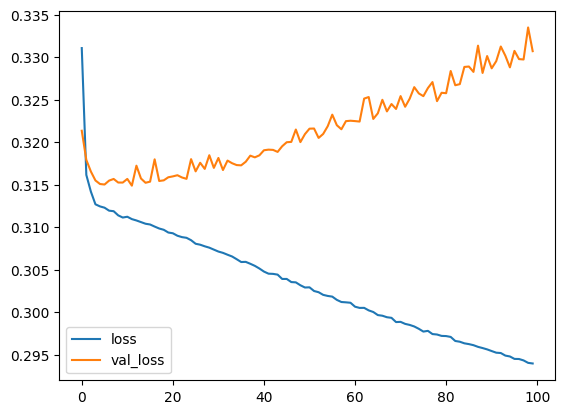

In [77]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [78]:
# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

In [79]:
model = Sequential()

model.add(Dense(units=82,activation='relu'))
model.add(Dense(units=41,activation='relu'))
model.add(Dense(units=20,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [80]:
model.fit(x=X_train, y=y_train,validation_data = (X_test, y_test),
         verbose=1, epochs=100, callbacks=[early_stop]
         )

Epoch 1/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.3303 - val_loss: 0.3176
Epoch 2/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.3136 - val_loss: 0.3177
Epoch 3/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.3113 - val_loss: 0.3153
Epoch 4/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.3128 - val_loss: 0.3159
Epoch 5/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.3130 - val_loss: 0.3182
Epoch 6/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 0.3117 - val_loss: 0.3162
Epoch 7/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 0.3134 - val_loss: 0.3155
Epoch 8/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 0.3101 - val_loss: 0.3152
Epoch 9/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 0.3104 - val_loss: 0.3152
Epoch 10/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.3128 - val_loss: 0.3159
Epoch 11/100
5586/5586 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - loss: 0.3093 - val_loss: 0.3171
Epoch 12

<Axes: >

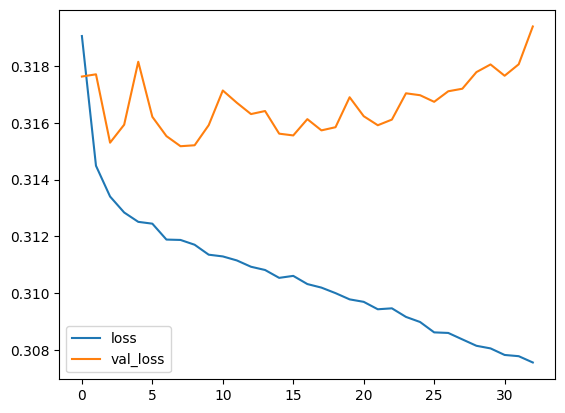

In [81]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [82]:
model = Sequential()

model.add(Dense(82,  activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(41, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

#Training the model
model.fit(x=X_train, y=y_train,validation_data = (X_test, y_test),
         verbose=1,batch_size=256, epochs=100)

Epoch 1/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.4196 - val_loss: 0.3235
Epoch 2/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3427 - val_loss: 0.3205
Epoch 3/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3326 - val_loss: 0.3189
Epoch 4/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3289 - val_loss: 0.3186
Epoch 5/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3240 - val_loss: 0.3184
Epoch 6/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3267 - val_loss: 0.3189
Epoch 7/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3237 - val_loss: 0.3180
Epoch 8/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3235 - val_loss: 0.3181
Epoch 9/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3210 - val_loss: 0.3169
Epoch 10/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3220 - val_loss: 0.3184
Epoch 11/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3189 - val_loss: 0.3176
Epoch 12/100
699/699 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

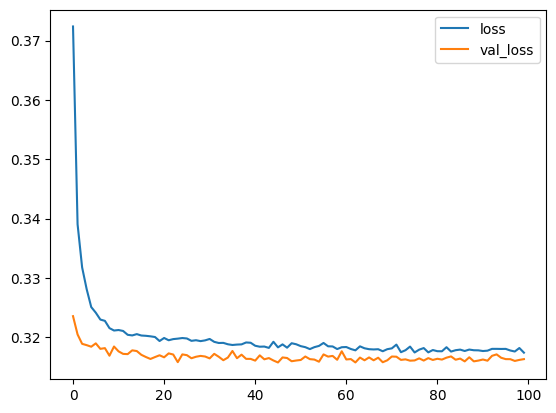

In [83]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()